In [174]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import datetime
import plotly.express as px

In [87]:
file2 = "C:/Users/mmore/Documents/Uni/Magistrale/ADM/HomeWork2 adm/lighter_authors.json"

In [88]:
# Chunk size
chunk_size = 200000
# Initialize an empty list to store chunks
authors = pd.DataFrame()
# Loop through each chunk and append it to the result dataframe
for chunk in pd.read_json(file2, lines=True, chunksize=chunk_size):
    # Select only the required columns from the chunk
    selected_chunk = chunk[["name", "gender", "fans_count", "average_rating", "ratings_count", "text_reviews_count", "works_count"]]
    #selected_chunk = chunk[["original_publication_date"]]
    # Append the selected chunk to the list
    authors = pd.concat([authors, selected_chunk], ignore_index=True)

In [89]:
authors.head(5)

,name,gender,fans_count,average_rating,ratings_count,text_reviews_count,works_count
0,Douglas Adams,male,19826,4.19,2862064,62681,106
1,Bill Bryson,male,16144,4.02,1417316,84176,75
2,Jude Fisher,female,60,4.53,56159,352,14
3,James Hamilton-Paterson,male,72,3.79,3302,480,45
4,Mark Watson,male,179,3.60,7979,772,61


Data cleaning on authors

In [90]:
authors2 = authors

In [91]:
authors2.dropna(subset=["name", "gender", "fans_count", "average_rating", "ratings_count", "text_reviews_count", "works_count"], inplace=True)

In [92]:
authors2 = authors2[(authors[["fans_count", "average_rating", "ratings_count", "text_reviews_count", "works_count"]] >= 0).all(axis=1)]

Books

In [93]:
file1 = "C:/Users/mmore/Documents/Uni/Magistrale/ADM/HomeWork2 adm/lighter_books.json"

In [94]:
# Chunk size
chunk_size = 200000
# Initialize an empty list to store chunks
books = pd.DataFrame()
# Loop through each chunk and append it to the result dataframe
for chunk in pd.read_json(file1, lines=True, chunksize=chunk_size):
    # Select only the required columns from the chunk
    selected_chunk = chunk[["title", "num_pages", "language", "average_rating", "ratings_count", "author_name", "original_publication_date", "publication_date"]]
    #selected_chunk = chunk[["original_publication_date"]]
    # Append the selected chunk to the list
    books = pd.concat([books, selected_chunk], ignore_index=True)

In [95]:
books.head(5)

,title,num_pages,language,average_rating,ratings_count,author_name,original_publication_date,publication_date
0,Harry Potter and the Order of the Phoenix (Har...,870,eng,4.50,2628006,J.K. Rowling,2003-06-21,2004-09
1,Harry Potter and the Sorcerer's Stone (Harry P...,309,eng,4.48,7377351,J.K. Rowling,1997-06-26,2003-11-01
2,Harry Potter and the Chamber of Secrets (Harry...,352,eng,4.43,2855044,J.K. Rowling,1998-07-02,2003-11-01
3,Harry Potter and the Prisoner of Azkaban (Harr...,435,eng,4.57,2946694,J.K. Rowling,1999-07-08,2004-05-01
4,Harry Potter and the Goblet of Fire (Harry Pot...,734,eng,4.56,2705676,J.K. Rowling,2000-07-08,2002-09-28


In [96]:
books.describe()

,average_rating,ratings_count
count,7.027431e+06,7.027431e+06
mean,3.306188e+00,1.945861e+04
std,1.435734e+00,1.609008e+05
min,0.000000e+00,0.000000e+00
25%,3.360000e+00,3.000000e+00
50%,3.810000e+00,4.500000e+01
75%,4.080000e+00,7.710000e+02
max,5.000000e+00,7.400639e+06


Data cleaning on Books

In [97]:
books2 = books

In [98]:
books2.dropna(subset=["title", "num_pages", "language", "average_rating", "ratings_count", "author_name", "original_publication_date", "publication_date"], inplace=True)

In [99]:
# Filter out rows with incorrect values in "num_pages" (e.g., non-numeric values)
books2['num_pages'] = pd.to_numeric(books2['num_pages'], errors='coerce')
books2 = books2[books2['num_pages'].notna()]
books2 = books2[books2['num_pages'] != 0]
min_num_pages = books2["num_pages"].min()

In [100]:
books2 = books2[(books2[["average_rating", "ratings_count", "num_pages"]] >= 0).all(axis=1)]

In [101]:
from datetime import datetime

books2["original_publication_date"] = pd.to_datetime(books2["original_publication_date"], errors='coerce')
books2["original_publication_date"] = pd.to_datetime(books2["original_publication_date"])
present_date = datetime.now()
books2 = books2[books2['original_publication_date'] <= present_date]
books2["original_publication_date"].max()

Timestamp('2023-09-13 00:00:00')

In [102]:
books2 = books2[books2["author_name"] != "NOT A BOOK"]

In [103]:
books2 = books2.drop_duplicates(subset = ["title"])

In [104]:
books2 = books2[books2["language"] != ""]

**Begin Q1**

Base statistics on average_rating
mean 3.65
median 3.95
min and max 0.0 5.0


<function matplotlib.pyplot.show(close=None, block=None)>

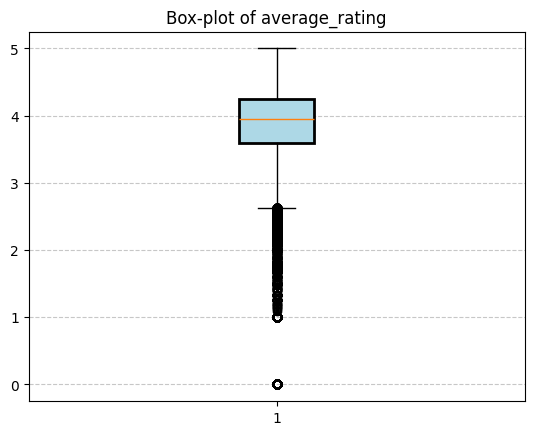

In [105]:
media = authors2['average_rating'].mean()
mediana = authors2['average_rating'].median()
minimo = authors2['average_rating'].min()
massimo = authors2['average_rating'].max()

print("Base statistics on average_rating")
print("mean", round(media, 2))
print("median", mediana)
print("min and max", minimo, massimo)

plt.boxplot(authors2["average_rating"], showfliers=True, patch_artist=True, boxprops={'facecolor': 'lightblue', 'linestyle': '--', 'linewidth': 2})
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title("Box-plot of average_rating")
plt.show

Base statistics on fans_count
mean 111.62
median 4.0
min and max 0 766035


<function matplotlib.pyplot.show(close=None, block=None)>

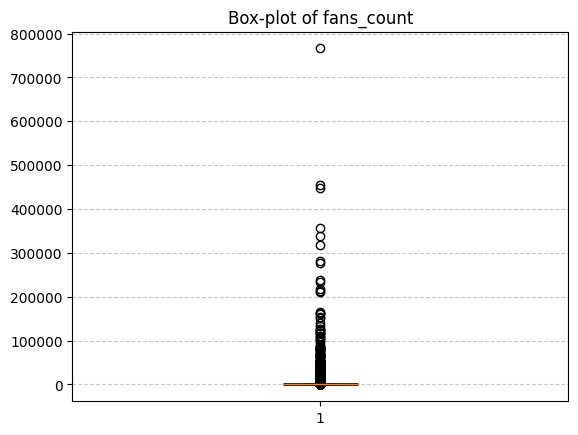

In [106]:
media = authors2['fans_count'].mean()
mediana = authors2['fans_count'].median()
minimo = authors2['fans_count'].min()
massimo = authors2['fans_count'].max()

print("Base statistics on fans_count")
print("mean", round(media, 2))
print("median", mediana)
print("min and max", minimo, massimo)

plt.boxplot(authors2["fans_count"], patch_artist=True, boxprops={'facecolor': 'lightblue', 'linestyle': '--', 'linewidth': 2}, showfliers=True)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title("Box-plot of fans_count")
plt.show

Base statistics on ratings_count
mean 4770.95
median 39.0
min and max 0 27003752


<function matplotlib.pyplot.show(close=None, block=None)>

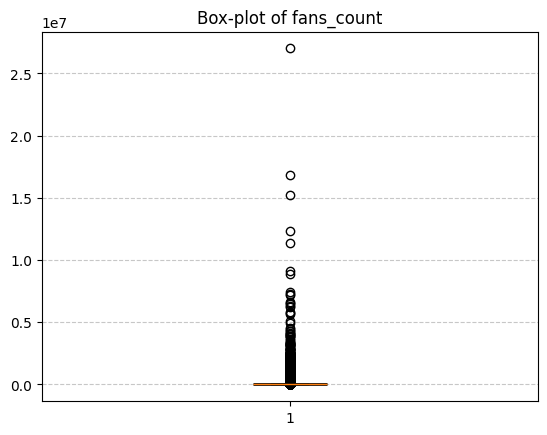

In [107]:
media = authors2['ratings_count'].mean()
mediana = authors2['ratings_count'].median()
minimo = authors2['ratings_count'].min()
massimo = authors2['ratings_count'].max()

print("Base statistics on ratings_count")
print("mean", round(media, 2))
print("median", mediana)
print("min and max", minimo, massimo)

plt.boxplot(authors2["ratings_count"], patch_artist=True, boxprops={'facecolor': 'lightblue', 'linestyle': '--', 'linewidth': 2}, showfliers=True)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title("Box-plot of fans_count")
plt.show

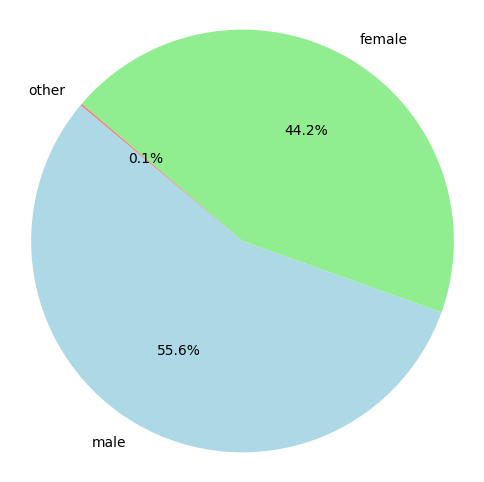

In [141]:
conteggio_output = authors2['gender'].value_counts().reset_index()
conteggio_output.columns = ['gender', 'count']
conteggio_output_ordinato = conteggio_output.sort_values(by='count', ascending=False)
conteggio_output_ordinato = conteggio_output_ordinato[conteggio_output_ordinato["gender"] != ""]
maschifemmine = conteggio_output_ordinato[conteggio_output_ordinato["gender"].isin(["male", "female"])]
riga_altro = pd.DataFrame({"gender": ["other"], "count": [conteggio_output_ordinato["count"].sum() - maschifemmine["count"].sum()]})
maschifemmine = pd.concat([maschifemmine, riga_altro], ignore_index=True)
plt.figure(figsize=(6, 6))  
plt.pie(maschifemmine['count'], labels=maschifemmine['gender'], autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'], startangle=140)
plt.title('')
plt.axis('equal')
plt.show()

Now on books

Base statistics on num_pages
mean 6189.6
median 232.0
min and max 1.0 2147483647.0


<function matplotlib.pyplot.show(close=None, block=None)>

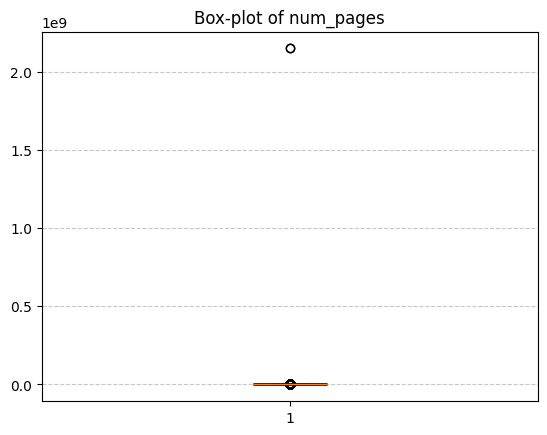

In [109]:
media = books2['num_pages'].mean()
mediana = books2['num_pages'].median()
minimo = books2['num_pages'].min()
massimo = books2['num_pages'].max()

print("Base statistics on num_pages")
print("mean", round(media, 1))
print("median", mediana)
print("min and max", minimo, massimo)

plt.boxplot(books2["num_pages"], patch_artist=True, boxprops={'facecolor': 'lightblue', 'linestyle': '--', 'linewidth': 2}, showfliers=True)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title("Box-plot of num_pages")
plt.show

Base statistics on average_rating
mean 3.69
median 3.91
min and max 0.0 5.0


<function matplotlib.pyplot.show(close=None, block=None)>

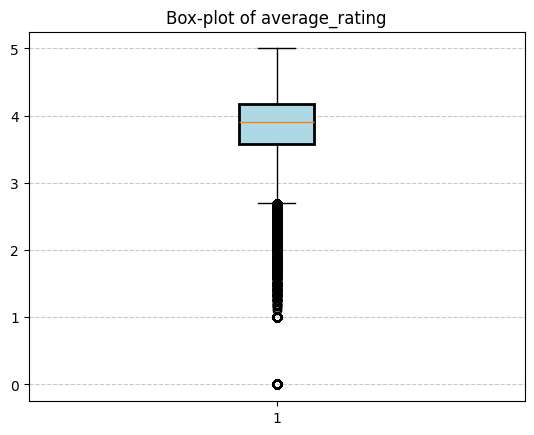

In [110]:
media = books2['average_rating'].mean()
mediana = books2['average_rating'].median()
minimo = books2['average_rating'].min()
massimo = books2['average_rating'].max()

print("Base statistics on average_rating")
print("mean", round(media, 2))
print("median", round(mediana, 2))
print("min and max", minimo, massimo)

plt.boxplot(books2["average_rating"], patch_artist=True, boxprops={'facecolor': 'lightblue', 'linestyle': '--', 'linewidth': 2}, showfliers=True)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title("Box-plot of average_rating")
plt.show

Base statistics on ratings_count
mean 24176.39
median 69.0
min and max 0 7400639


<function matplotlib.pyplot.show(close=None, block=None)>

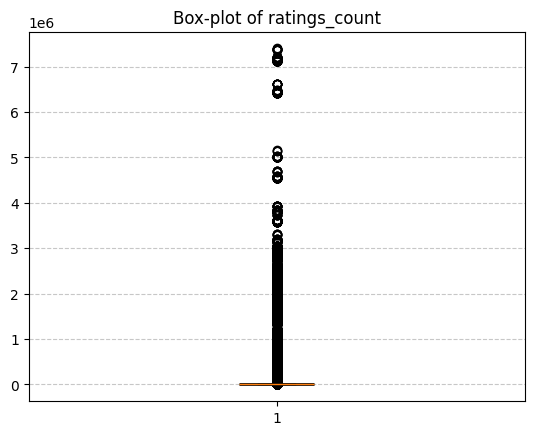

In [111]:
media = books2['ratings_count'].mean()
mediana = books2['ratings_count'].median()
minimo = books2['ratings_count'].min()
massimo = books2['ratings_count'].max()

print("Base statistics on ratings_count")
print("mean", round(media, 2))
print("median", round(mediana, 2))
print("min and max", minimo, massimo)

plt.boxplot(books2["ratings_count"], patch_artist=True, boxprops={'facecolor': 'lightblue', 'linestyle': '--', 'linewidth': 2}, showfliers=True)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title("Box-plot of ratings_count")
plt.show

In [112]:
books2["original_publication_date"] = pd.to_datetime(books2["original_publication_date"], errors='coerce')

books2["original_publication_date"] = pd.to_datetime(books2["original_publication_date"])


data_minima = books2["original_publication_date"].min()


data_massima = books2["original_publication_date"].max()


print("Data minima:", data_minima)
print("Data massima:", data_massima)

Data minima: 1678-03-17 00:00:00
Data massima: 2022-10-15 00:00:00


  language   count
0      eng  332342
1      ger   37722
2      spa   35414
3      fre   34707
4      ita   30661
5    en-US   29769
6      por   24587
7    en-GB   21027
8       nl   17542
9      ara   15204


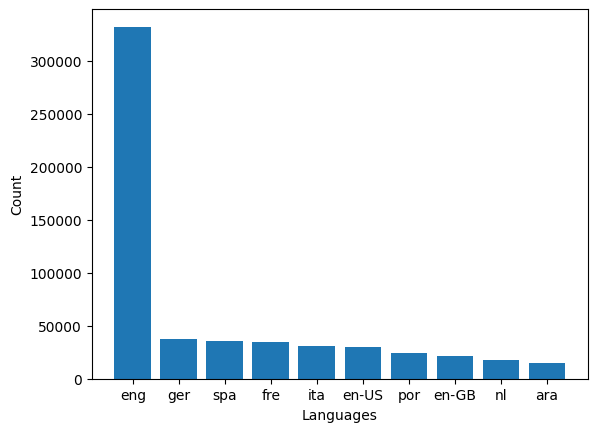

In [113]:
conteggio_output = books2['language'].value_counts().reset_index()
conteggio_output.columns = ['language', 'count']
conteggio_output = conteggio_output.dropna()  
conteggio_output_ordinato = conteggio_output.sort_values(by='count', ascending=False)
print(conteggio_output_ordinato.head(10))


primi10 = conteggio_output_ordinato.head(10)
plt.bar(primi10["language"], primi10['count'])
plt.xlabel('Languages')
plt.ylabel('Count')
plt.show()

**Begin Q2**

**Quest1**

 Plot the number of books for each author in descending order.

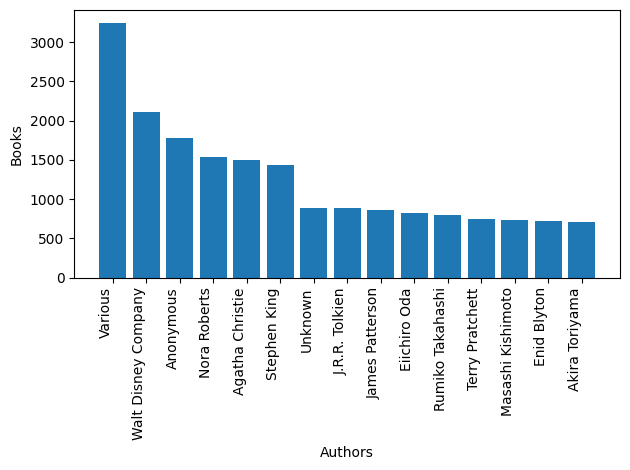

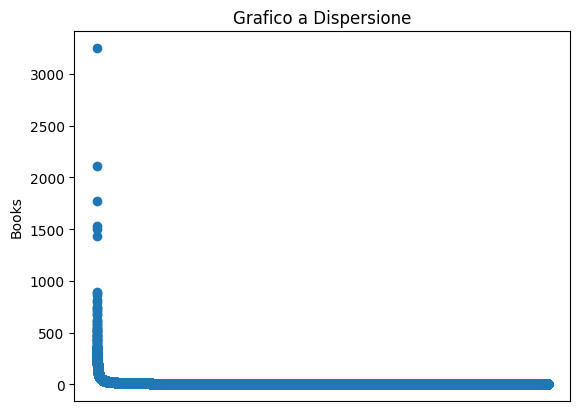

In [184]:
conteggio_libri_per_autore = books2["author_name"].value_counts().sort_values(ascending=False).reset_index()
conteggio_libri_per_autore.columns = ['Author', 'Number of books']

top15 = conteggio_libri_per_autore.head(15)

plt.bar(top15["Author"], top15['Number of books'])
plt.xticks(rotation=90, ha='right')
plt.xlabel('Authors')
plt.ylabel('Books')
plt.tight_layout()
plt.show()

plt.scatter(conteggio_libri_per_autore["Author"], conteggio_libri_per_autore["Number of books"])

plt.xticks([])

plt.ylabel('Books')

plt.title('Grafico a Dispersione')

plt.show()

**Quest2**

 Which book has the highest number of reviews?


In [115]:
books2_sorted = books2.sort_values(by='ratings_count', ascending=False)

In [116]:
books2_sorted.head(1)

,title,num_pages,language,average_rating,ratings_count,author_name,original_publication_date,publication_date
5236525,Harry Potter und der Stein der Weisen (Harry P...,335.0,ger,4.48,7400639,J.K. Rowling,1997-06-26,2012-04-24


The book with the highest number of reviews is Harry Potter und der Stein der Weisen ( HP and the Philosopher's Stone)

**Quest3**

 Which are the top ten and ten worst books concerning the average score?

In [117]:
books2_sorted2 = books2.sort_values(by='average_rating', ascending=False)
books2_sorted2.head(10)

,title,num_pages,language,average_rating,ratings_count,author_name,original_publication_date,publication_date
4851616,Phantom-The Revenge Of The Ghost Part III ( In...,32.0,eng,5.0,3,Lee Falk,1980-06-01,1980-06-01
2987720,The Kindred Spirits: Rivers Return,228.0,eng,5.0,2,Melvin A. Taylor,2011-07-01,2011-07-07
4370871,NOIF: A Mind-Blowing Short Story Collection,52.0,eng,5.0,4,Tuan Ho,2012-10-03,2012-10-03
4370894,I Don't Mind if I Do,256.0,eng,5.0,2,Elspeth Huxley,1950-01-01,1950
4013166,Indies Unlimited: 2013 Writing Stimulus Packag...,34.0,eng,5.0,1,K.S. Brooks,2012-10-24,2012-10-24
6206308,Simple SMART & Happy --A SMART Living 365 Guid...,108.0,en-US,5.0,2,Kathy Gottberg,2014-06-01,2014-06-01
6206309,The Shadow of the Mind's Heart,104.0,eng,5.0,3,Cheryllynn Dyess,2014-07-04,2014-07-04
4370965,Българската орисия,333.0,bul,5.0,1,Веселин Божков,2004-01-01,2004
2987723,Funerali senza dio. Manuale pratico per la cel...,200.0,ita,5.0,2,Richard Brown,2010-03-15,2010-03-15
3465413,Essays and Other Writings,425.0,eng,5.0,1,Ralph Waldo Emerson,1911-01-01,1911


The books with the highest avg rating are:
"Phantom-The Revenge Of The Ghost Part III (Indrajal Comics No. 251)" by "Lee Falk"
"The Kindred Spirits: Rivers Return" by "Melvin A. Taylor"
"NOIF: A Mind-Blowing Short Story Collection" by "Tuan Ho"
"I Don't Mind if I Do" by "Elspeth Huxley"
"Indies Unlimited: 2013 Writing Stimulus Package and Planner" by "K.S. Brooks"
"Simple SMART & Happy --A SMART Living 365 Guide" by "Kathy Gottberg"
"The Shadow of the Mind's Heart" by "Cheryllynn Dyess"
"Българската орисия" by "Веселин Божков"
"Funerali senza dio. Manuale pratico per la celebrazione dell'esequie civili" by "Richard Brown"
"Essays and Other Writings" by "Ralph Waldo Emerson"
BUT. All this books have a small number of ratings, so I'll discard all the books with less than 20 reviews for better interpretation

In [118]:
books2_filtered = books2[(books2[["ratings_count"]] >= 20).all(axis=1)]

In [119]:
books2_sorted2 = books2_filtered.sort_values(by='average_rating', ascending=False)
books2_sorted2.head(10)

,title,num_pages,language,average_rating,ratings_count,author_name,original_publication_date,publication_date
6133847,Optimized Nutrition Vol. 5 Building a huge big...,264.0,eng,5.0,174,Travis S. Miller,2014-06-10,2014-06-10
6359239,A Silent Canvas Part Two (A Silent Canvas #2),220.0,eng,5.0,27,Melissa Ann,2014-06-09,2014-06-09
4393669,The Secrets of Albion Falls (The Secrets Serie...,330.0,en-GB,5.0,22,Sass Cadeaux,2013-02-02,2013-01-28
5058263,"The Other Whisper (Other Series, #1)",267.0,eng,5.0,22,Ian Paul Power,2013-11-25,2013-11-25
5782558,Optimized Nutrition Vol. 4: Building a Bigger ...,302.0,eng,5.0,211,Travis S. Miller,2014-03-10,2014-03-10
6042115,Yeshu'a: The Story of the Hidden Life of Jesus...,346.0,eng,5.0,20,Pietro de la Luna,2014-04-30,2014-04-28
6367886,Optimized Nutrition Vol. 6,258.0,eng,5.0,169,Travis S. Miller,2014-09-10,2014-09-10
4931024,The Aryanist,40.0,hin,5.0,22,Mohit Sharma,2013-10-18,2013-10-18
4739939,Gyanoday Children's Educational Book Series,650.0,eng,5.0,20,Mohit Sharma,2009-01-01,2009
4420941,Long Live Inquilab!,49.0,eng,5.0,23,Mohit Sharma,2012-08-23,2012-08-23


The 10 books with the highest average_rating with at leas 20 reviews are: "Optimized Nutrition Vol. 5 Building a huge big body that commands attention" by "Travis S. Miller"
"A Silent Canvas Part Two (A Silent Canvas #2)" by "Melissa Ann"
"The Secrets of Albion Falls (The Secrets Series, #1)" by "Sass Cadeaux"
"The Other Whisper (Other Series, #1)" by "Ian Paul Power"
"Optimized Nutrition Vol. 4: Building a Bigger Body with Intermittent Fasting" by "Travis S. Miller"
"Yeshu'a: The Story of the Hidden Life of Jesus" by "Pietro de la Luna"
"Optimized Nutrition Vol. 6" by "Travis S. Miller"
"The Aryanist" by "Mohit Sharma"
"Gyanoday Children's Educational Book Series" by "Mohit Sharma"
"Long Live Inquilab!" by "Mohit Sharma"

In [120]:
books2_sorted2 = books2_filtered.sort_values(by='average_rating', ascending=True)
nodoppioni = books2_sorted2.drop_duplicates(subset = ["title"])
nodoppioni = nodoppioni[nodoppioni["title"] != "Collectives in a Forsaken Landscape"]
nodoppioni.head(10)


,title,num_pages,language,average_rating,ratings_count,author_name,original_publication_date,publication_date
643920,Collectives In A Forsaken Landscape,207.0,eng,1.00,30,Nickolaus Pacione,2004-08-03,2008-11-25
666266,Reality Check: A Horror Anthology,144.0,eng,1.19,21,Nickolaus Pacione,2004-09-30,2004-09-30
4323651,Melanie's Marvelous Measles,40.0,eng,1.31,156,Stephanie Messenger,2012-11-29,2012-11-29
4336211,Hell's Shadows,418.0,en-GB,1.37,41,Dean Klein,2012-11-16,
6431804,Empress Theresa,418.0,eng,1.38,112,Norman Boutin,2014-03-14,2014-03-14
6819655,زنزانه 23,161.0,ara,1.39,104,أحمد فكري,2015-01-01,2015
2935751,Nickolaus Albert Pacione Delivers: A Library O...,302.0,eng,1.43,23,Nickolaus Pacione,2007-12-16,2011-06-14
6504090,The Girl with the Solar Eyes (The Tale of Onor...,125.0,eng,1.45,155,Dylan Saccoccio,2014-11-07,2014-11-07
5625004,حكايات لمن يكرهون النوم,260.0,ara,1.50,26,مروان محمد,2013-05-20,2013-05-20
5947366,The Boy and the Peddler of Death (The Tale of ...,96.0,eng,1.54,591,Dylan Saccoccio,2014-04-07,2014-04-07


The 10 worst books by average rating are: "Collectives In A Forsaken Landscape" by "Nickolaus Pacione"
"Reality Check: A Horror Anthology" by "Nickolaus Pacione"
"Melanie's Marvelous Measles" by "Stephanie Messenger"
"Hell's Shadows" by "Dean Klein"
"Empress Theresa" by "Norman Boutin"
"زنزانه 23" by "أحمد فكري"
"Nickolaus Albert Pacione Delivers: A Library Of Unknown Horrors" by "Nickolaus Pacione"
"The Girl with the Solar Eyes (The Tale of Onor & Orla, #1)" by "Dylan Saccoccio"
"حكايات لمن يكرهون النوم" by "مروان محمد"
"The Boy and the Peddler of Death (The Tale of Onor & Orla, #2)" by "Dylan Saccoccio"

**Quest 4**

Explore the different languages in the book’s dataset, providing a proper chart summarizing how these languages are distributed throughout our virtual library.

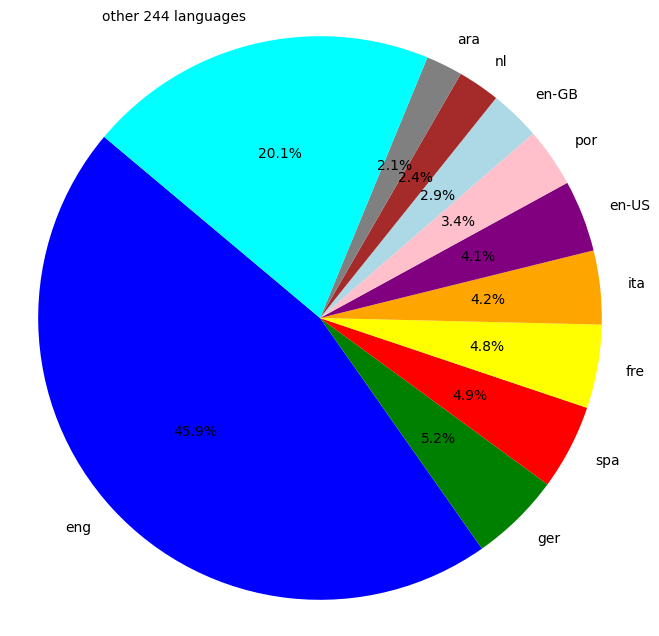

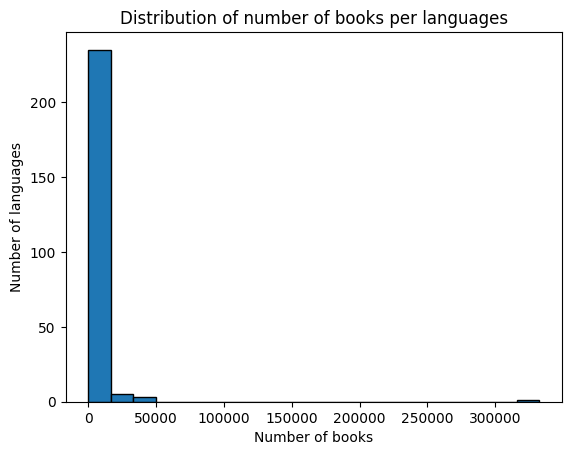

In [167]:
lingue_counts = books2['language'].value_counts().reset_index()
lingue_counts.columns = ['language', 'count']  # Correggi l'assegnazione delle colonne
(lingue_counts.shape[0])

top50lingue = lingue_counts.head(50)
(top50lingue.head(2))

top10lingue = lingue_counts[lingue_counts["language"].isin(["eng", "ger", "spa", "fre", "ita", "en-US", "por", "en-GB", "nl", "ara"])]
(top10lingue.head(10))

riga_altro = pd.DataFrame({"language": ["other 244 languages"], "count": [lingue_counts["count"].sum() - top10lingue["count"].sum()]})
top10lingue = pd.concat([top10lingue, riga_altro], ignore_index=True)

plt.figure(figsize=(8, 8))  # Imposta le dimensioni del grafico
plt.pie(top10lingue['count'], labels=top10lingue['language'], autopct='%1.1f%%', colors=['blue', 'green', 'red', 'yellow', 'orange', 'purple', 'pink', 'lightblue', 'brown', 'gray', 'cyan'], startangle=140)
plt.title('')
plt.axis('equal')
plt.show()

plt.hist(lingue_counts['count'], bins=20, edgecolor='k')  
plt.xlabel('Number of books')
plt.ylabel('Number of languages')
plt.title('Distribution of number of books per languages')
plt.show()

**Quest 5**

How many books have more than 250 pages?



In [122]:
bookspiu250 = books2[(books2[["num_pages"]] >= 250).all(axis=1)]

In [123]:
bookspiu250.shape[0]

333629

The books with more than 250 pages are 685838

**Quest 6**

Plot the distribution of the fans count for the 50 most prolific authors (the ones who have written more books).


In [124]:
author_book_counts = books2.groupby('author_name')['title'].count().reset_index()
author_book_counts = author_book_counts.sort_values(by='title', ascending=False)
top50autor = author_book_counts.head(50)
top50autor = top50autor.rename(columns={"author_name": "name"})

In [125]:
nuovo_dataset = pd.merge(top50autor, authors2, on='name', how='left')


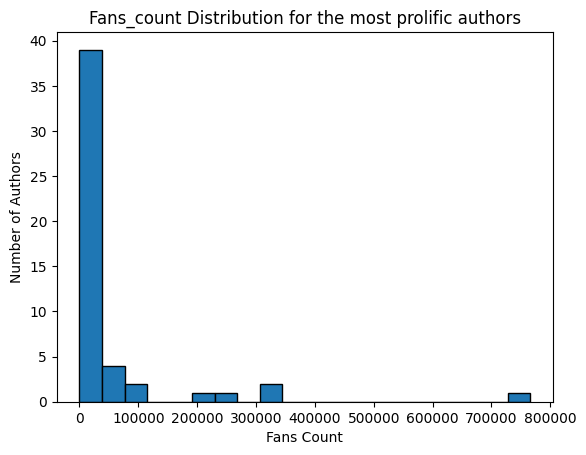

In [165]:
fans_count_autori_prolifici = nuovo_dataset['fans_count']

plt.hist(fans_count_autori_prolifici, bins=20, edgecolor='k')
plt.xlabel('Fans Count')
plt.ylabel('Number of Authors')
plt.title('Fans_count Distribution for the most prolific authors')
plt.show()